In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

##from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [2]:
##np.savetxt("C:\\Users\\woo\\Desktop\\python\\keras_tutorial\\X.csv", X, delimiter=",")
##np.savetxt("C:\\Users\\woo\\Desktop\\python\\keras_tutorial\\Y.csv", Y, delimiter=",")

X = np.genfromtxt('X.csv', delimiter=',')
Y = np.genfromtxt('Y.csv', delimiter=',')
Y = Y.reshape((1,400))
print(X.shape,Y.shape)

(2, 400) (1, 400)


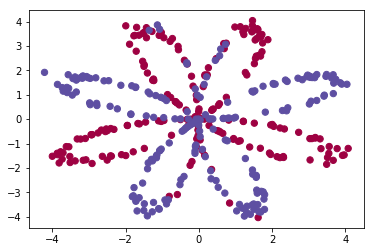

In [3]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral)

In [4]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\woo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\woo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [6]:
# Plot the decision boundary for logistic regression
#plot_decision_boundary(lambda x: clf.predict(x), X, Y)
#plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


In [7]:
class Neural_2layer:
    def __init__(self, X, y, nodes, output=1, learnR = 0.1):
        self.X = X
        self.y = y
        n = nodes
        nx = X.shape[0]
        self.alpha = learnR
        self.m = X.shape[1]
        self.W1 = np.random.randn(nx,n)*0.01
        self.b1 = np.random.randn(n,1)*0.01
        self.W2 = np.random.randn(n,output)*0.01##output only one value
        self.b2 = np.random.randn(output,1)*0.01
        return
        
    def forward(self):
        self.Z1 = np.dot(self.W1.T,self.X)+self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.W2.T,self.A1) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        self.L = self.loss(self.A2,self.y)
        self.C = self.cost(self.L)
        return
        
    def backword(self):
        dz2 = self.A2-self.y
        dw2 = 1/self.m * np.dot(dz2,self.A1.T)
        db2 = 1/self.m * np.sum(dz2)
        
        dz1 = np.dot(self.W2,dz2)*self.A1*(1-self.A1)
        dw1 = 1/self.m * np.dot(dz1,self.X.T)
        db1 = 1/self.m * np.sum(dz1)
        
        ##print("Shape of dw1 is {} / W1 is {}".format(dw1.shape, self.W1.shape))
        ##print("Shape of dw2 is {} / W2 is {}".format(dw2.shape, self.W2.shape))
        self.W1 -= self.alpha*dw1.T
        self.b1 -= self.alpha*db1
        self.W2 -= self.alpha*dw2.T
        self.b2 -= self.alpha*db2
        return
        
    def train(self,epochNum):
        for i in range(epochNum):
            self.forward()
            if(i % 10000==0):
                print("Epoch {}, Trainning Loss/Cost value is {}".format(i,self.C))
            self.backword()
        return
    
    def predict(self, X):
        Z1 = np.dot(self.W1.T,X)+self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(self.W2.T,A1) + self.b2
        A2 = self.sigmoid(Z2)
        L = self.loss(A2,self.y)
        C = self.cost(L)
        return A2, C
    
    def sigmoid(self,z):
        return 1 / (1+np.exp(-z))
    
    def loss(self,a, y):
        return -(y*np.log(a)+(1-y)*np.log(1-a))
    
    def cost(self,loss):
        return 1/len(loss)*np.sum(loss)

In [8]:
clf = Neural_2layer(X,Y,3)
clf.train(200000)

Epoch 0, Trainning Loss/Cost value is 277.274092648542
Epoch 10000, Trainning Loss/Cost value is 136.33225308081
Epoch 20000, Trainning Loss/Cost value is 123.4701689091487
Epoch 30000, Trainning Loss/Cost value is 119.14441026763205
Epoch 40000, Trainning Loss/Cost value is 116.52758278609804
Epoch 50000, Trainning Loss/Cost value is 114.63918980570239
Epoch 60000, Trainning Loss/Cost value is 113.15997859590668
Epoch 70000, Trainning Loss/Cost value is 111.94673557302283
Epoch 80000, Trainning Loss/Cost value is 110.92242332736143
Epoch 90000, Trainning Loss/Cost value is 110.04042336918025
Epoch 100000, Trainning Loss/Cost value is 109.27009585872139
Epoch 110000, Trainning Loss/Cost value is 108.59003551336575
Epoch 120000, Trainning Loss/Cost value is 107.98457294683374
Epoch 130000, Trainning Loss/Cost value is 107.44181011160283
Epoch 140000, Trainning Loss/Cost value is 106.95244683446606
Epoch 150000, Trainning Loss/Cost value is 106.5090436806656
Epoch 160000, Trainning Loss/

In [9]:
pred_y,cost = clf.predict(X)
pred_y.shape

(1, 400)

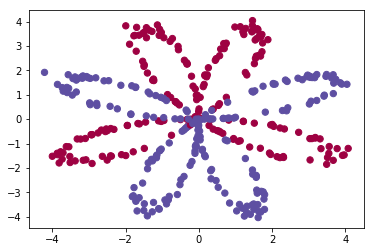

In [10]:
f = lambda x : 0 if x < 0.5 else 1
pred_y = np.array([f(x) for x in pred_y[0]])
plt.scatter(X[0, :], X[1, :], c=pred_y, s=40, cmap=plt.cm.Spectral)